In [1]:
from Hamiltonian_definition import build_HN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from itertools import zip_longest
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import dok_matrix
from scipy.sparse import block_diag
from scipy.sparse.linalg import eigsh
import scipy.linalg as la
import os
import Hamiltonian_definition as HD

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
save_path = "/home/costanza/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/Lanczos/"
Lx, Ly = 4,4 # lattice dim
L=Lx*Ly
dim=2**(Lx*Ly)


### Lattice definition

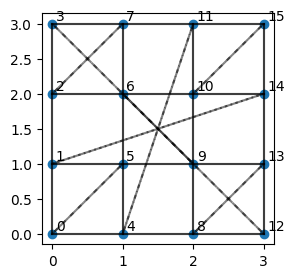

0 --> Nearest neighbors: [4, 3]  -- Next neighbor: [5]
1 --> Nearest neighbors: [5, 0]  -- Next neighbor: [14]
2 --> Nearest neighbors: [6, 1]  -- Next neighbor: [7]
3 --> Nearest neighbors: [7, 2]  -- Next neighbor: [12]
4 --> Nearest neighbors: [8, 7]  -- Next neighbor: [11]
5 --> Nearest neighbors: [9, 4]  -- Next neighbor: [0]
6 --> Nearest neighbors: [10, 5]  -- Next neighbor: [9]
7 --> Nearest neighbors: [11, 6]  -- Next neighbor: [2]
8 --> Nearest neighbors: [12, 11]  -- Next neighbor: [13]
9 --> Nearest neighbors: [13, 8]  -- Next neighbor: [6]
10 --> Nearest neighbors: [14, 9]  -- Next neighbor: [15]
11 --> Nearest neighbors: [15, 10]  -- Next neighbor: [4]
12 --> Nearest neighbors: [0, 15]  -- Next neighbor: [3]
13 --> Nearest neighbors: [1, 12]  -- Next neighbor: [8]
14 --> Nearest neighbors: [2, 13]  -- Next neighbor: [1]
15 --> Nearest neighbors: [3, 14]  -- Next neighbor: [10]


In [11]:
coor = HD.generate_lattice(Lx,Ly)
neighbors_indices = HD.index_nn(coor,Lx,Ly)
diag_indices = HD.index_nnn(coor,Lx,Ly)

HD.plot_lattice(coor,neighbors_indices,diag_indices)

In [5]:
"""dim=2**(Lx*Ly)
c = []
for i in range(dim):
    c.append(bin(i)[2:].zfill(Lx*Ly)) #converts i into binary (removing a prefix), .zfill --> Lx*Ly=binary string length
print(len(c))
#print(c[0], c[1], c[2], c[-1])"""

'dim=2**(Lx*Ly)\nc = []\nfor i in range(dim):\n    c.append(bin(i)[2:].zfill(Lx*Ly)) #converts i into binary (removing a prefix), .zfill --> Lx*Ly=binary string length\nprint(len(c))\n#print(c[0], c[1], c[2], c[-1])'

## Sparse total matrix 

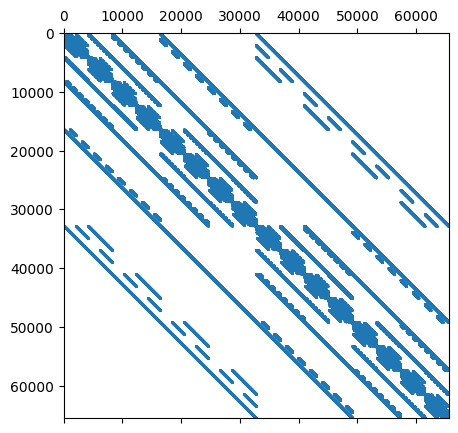

CPU times: user 16.7 s, sys: 830 ms, total: 17.6 s
Wall time: 17.1 s


In [ ]:
%%time
#matrice sparsa


row,col,data = [],[],[]
for i in range(dim):
    state = i
    H = HD.Hamiltonian(J1, J2, state, Lx, Ly, neighbors_indices, diag_indices)
    for value,j in H:
        row.append(i)      
        col.append(j)      
        data.append(value) #appende value in posizione (i,j) 
sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
#print(sparse_matrix.toarray())

plt.figure(figsize=(5,5))
plt.spy(sparse_matrix, markersize=0.5)
# plt.savefig(full_path + "sparse_matrix.png")

plt.show()

In [9]:
"""base_1 = build_basisN(L,1)
print(base_1)
for state in base_1:
    print(format(state, f'0{L}b'))

base_2 = build_basisN(L,2)
print(base_2)
for state in base_2:
    print(format(state, f'0{L}b'))"""

"base_1 = build_basisN(L,1)\nprint(base_1)\nfor state in base_1:\n    print(format(state, f'0{L}b'))\n\nbase_2 = build_basisN(L,2)\nprint(base_2)\nfor state in base_2:\n    print(format(state, f'0{L}b'))"

'%%time\ndiag_block_matrix = H_diag_block(L,J1,J2)\nplt.figure(figsize=(5,5))\nplt.spy(diag_block_matrix, markersize=0.5)\nplt.show()'

### Diagonalization of the total matrix

In [12]:
"""
#sparse_matrix MATRICE (sparsa)
#diag_block_matrix MATRICE DIAGONALE A BLOCCHI (sparsa)
vals, vecs = eigsh(sparse_matrix, k=60, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
vals_diag, vecs_diag = eigsh(diag_block_matrix, k=60, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric

plt.plot(vals, "o")
plt.plot(vals_diag, "+")"""

'\n#sparse_matrix MATRICE (sparsa)\n#diag_block_matrix MATRICE DIAGONALE A BLOCCHI (sparsa)\nvals, vecs = eigsh(sparse_matrix, k=60, which=\'SA\') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric\nvals_diag, vecs_diag = eigsh(diag_block_matrix, k=60, which=\'SA\') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric\n\nplt.plot(vals, "o")\nplt.plot(vals_diag, "+")'

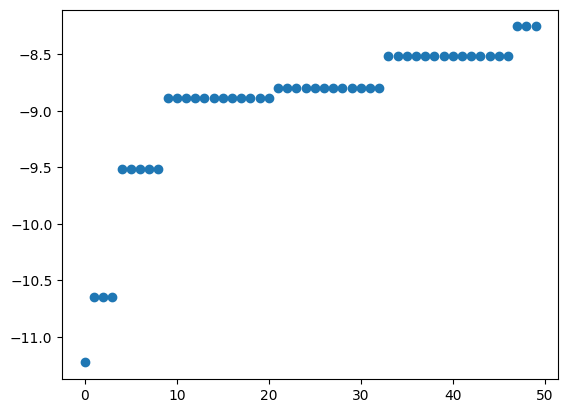

CPU times: user 4min 11s, sys: 2min 28s, total: 6min 40s
Wall time: 2min 22s


In [14]:
%%time
#sparse_matrix MATRICE (sparsa)
#diag_block_matrix MATRICE DIAGONALE A BLOCCHI (sparsa)
vals, vecs = eigsh(sparse_matrix, k=50, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
np.save(full_path+"50eigvals", vals)
np.save(full_path+"50eigvecs", vecs)
plt.plot(vals, "o")
# plt.savefig(full_path + "60_eigen_values.png")
plt.show()

In [21]:
print(vals[0])

-11.228483208428846


In [15]:
"""%%time
#sparse_matrix MATRICE (sparsa)
#diag_block_matrix MATRICE DIAGONALE A BLOCCHI (sparsa)
vals_diag, vecs_diag = eigsh(diag_block_matrix, k=60, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric

plt.plot(vals_diag, "+")"""

'%%time\n#sparse_matrix MATRICE (sparsa)\n#diag_block_matrix MATRICE DIAGONALE A BLOCCHI (sparsa)\nvals_diag, vecs_diag = eigsh(diag_block_matrix, k=60, which=\'SA\') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric\n\nplt.plot(vals_diag, "+")'

## LOOP

-6.000000000000006


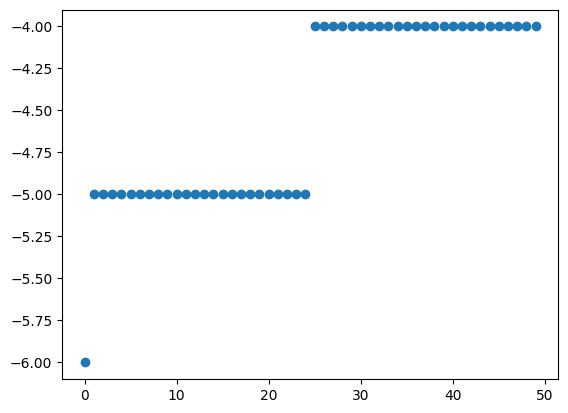

-5.884711682419373


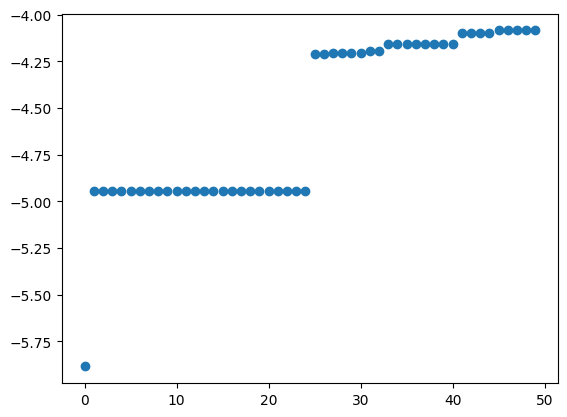

-5.543277195067702


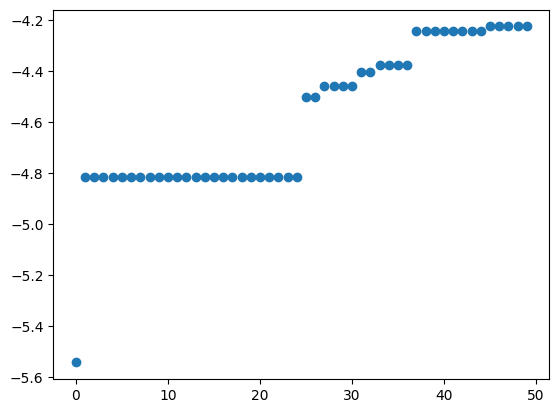

-5.003067352111764


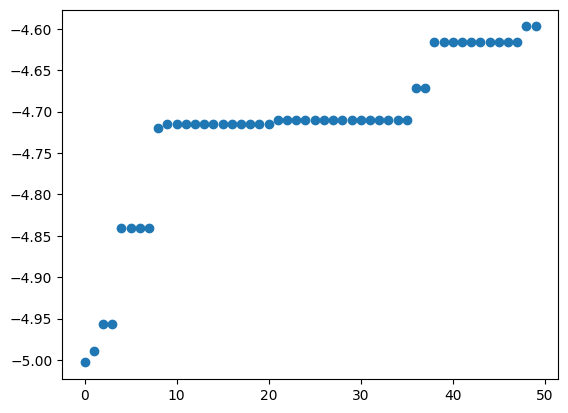

-6.80538265006794


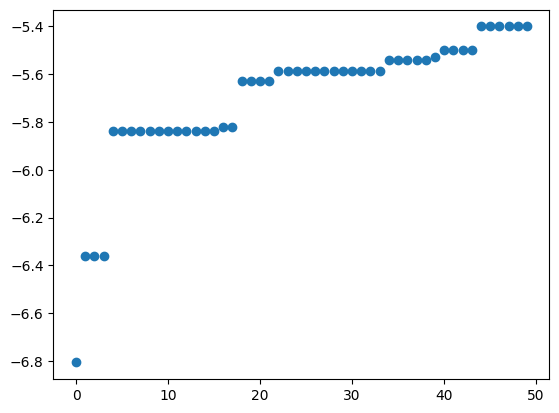

-8.419872389258167


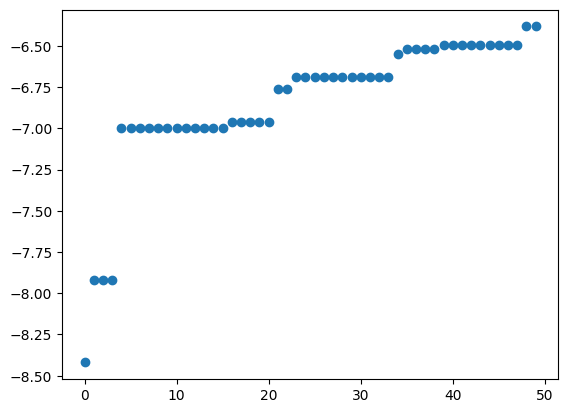

-9.732464854061075


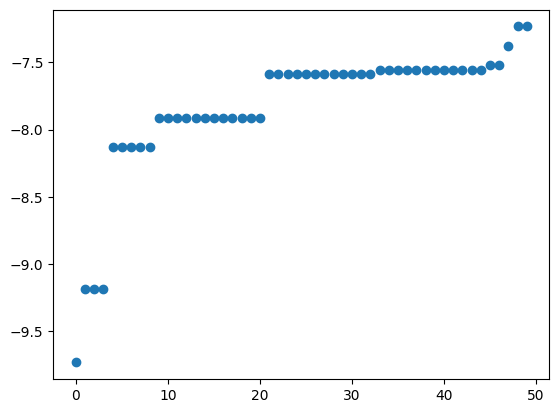

-10.68209758397915


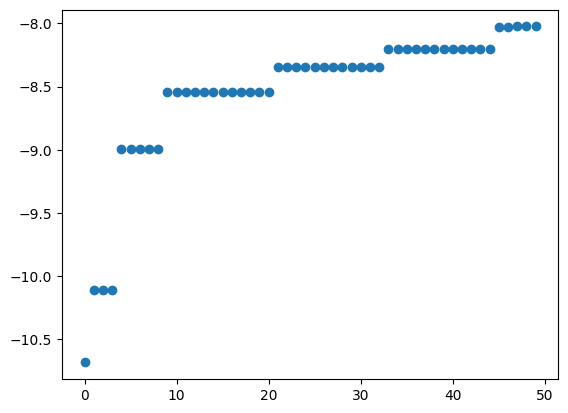

-11.22848320842874


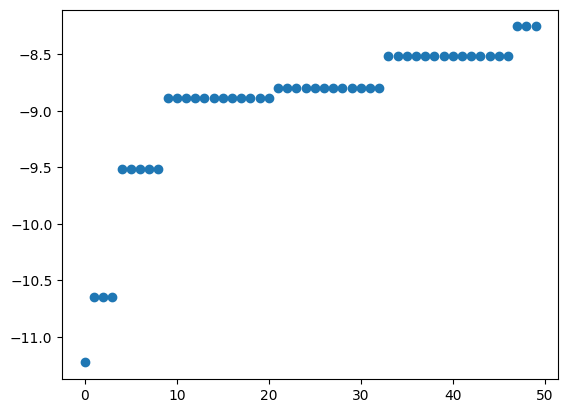

In [16]:
all_theta = [i*np.pi/16 for i in range(9)]
for F in range(len(all_theta)):
    J1 = np.sin(all_theta[F])
    J2 = np.cos(all_theta[F])
    folder_name = f"J1={round(J1,2)}_J2={round(J2,2)}/"
    full_path = save_path + folder_name
    os.makedirs(full_path, exist_ok=True)       

    #matrice sparsa
    row,col,data = [],[],[]
    for i in range(dim):
        state = i
        H = HD.Hamiltonian(J1, J2, state, Lx, Ly, neighbors_indices, diag_indices)
        for value,j in H:
            row.append(i)      
            col.append(j)      
            data.append(value) #appende value in posizione (i,j) 
    sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
    #print(sparse_matrix.toarray())

    #diag
    vals, vecs = eigsh(sparse_matrix, k=50, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    print(vals[0])
    np.save(full_path+"50eigvals", vals)
    np.save(full_path+"50eigvecs", vecs)
    plt.plot(vals, "o")
    plt.show()

## (exact) Diagonalization of the single blocks

### Blocks (NON FARLO GIRARE DI NUOVO PER I DUE CASI LIMITE)

In [8]:
HN = []
for N in range(Lx*Ly+1):
    HN.append(build_HN(L,N,J1,J2))
    print(HN[N].shape)

(1, 1)
(16, 16)
(120, 120)
(560, 560)
(1820, 1820)
(4368, 4368)
(8008, 8008)
(11440, 11440)
(12870, 12870)
(11440, 11440)
(8008, 8008)
(4368, 4368)
(1820, 1820)
(560, 560)
(120, 120)
(16, 16)
(1, 1)


In [14]:
HN_dict = {}
HN_dict[f'HN_{N}'] = HN[N].toarray()

"""fig, ax = plt.subplots(figsize=(3,3))  
im = ax.imshow(HN_dict[f'HN_{N}'], cmap='rainbow')  
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10) 
plt.show()"""

"fig, ax = plt.subplots(figsize=(3,3))  \nim = ax.imshow(HN_dict[f'HN_{N}'], cmap='rainbow')  \ncbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)\ncbar.ax.tick_params(labelsize=10) \nplt.show()"

CPU times: user 63.3 ms, sys: 28.5 ms, total: 91.8 ms
Wall time: 87.3 ms


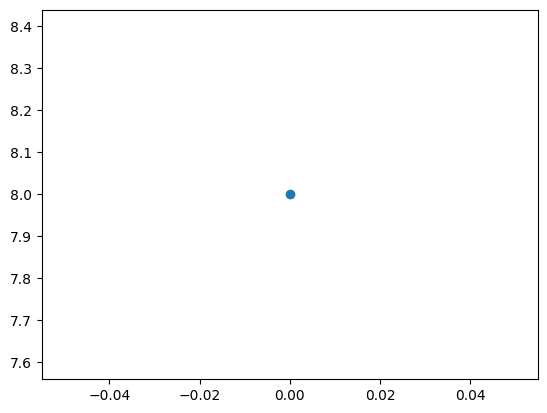

In [15]:
%%time
eigvals, eigvecs = la.eigh(HN_dict[f'HN_{N}'])
plt.plot(eigvals, "o")
#a=np.load(full_path+f"eigvals block N={1}/"+f"eigvals_N={1}.npy")
#plt.plot(a, "+")

In [16]:

folder_name = f"eigvals block N={N}/"
path = full_path + folder_name
os.makedirs(path, exist_ok=True)
np.save(path+f"eigvals_N={N}", eigvals)
np.save(path+f"eigvecs_N={N}", eigvecs)

In [ ]:
"""%%time
diag_block_matrix = H_diag_block(L,J1,J2)
plt.figure(figsize=(5,5))
plt.spy(diag_block_matrix, markersize=0.5)
plt.show()"""

### J1=0, J2=1

/tmp/ipykernel_11561/13707369.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


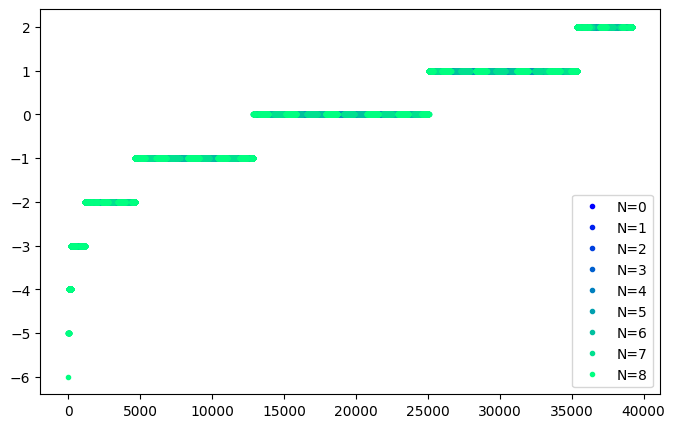

[8 7 7 8 8 7 7 7 7 7 7 8 8 8 8]


In [25]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=0.0_J2=1.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()

print(all_labels_sorted[:15])

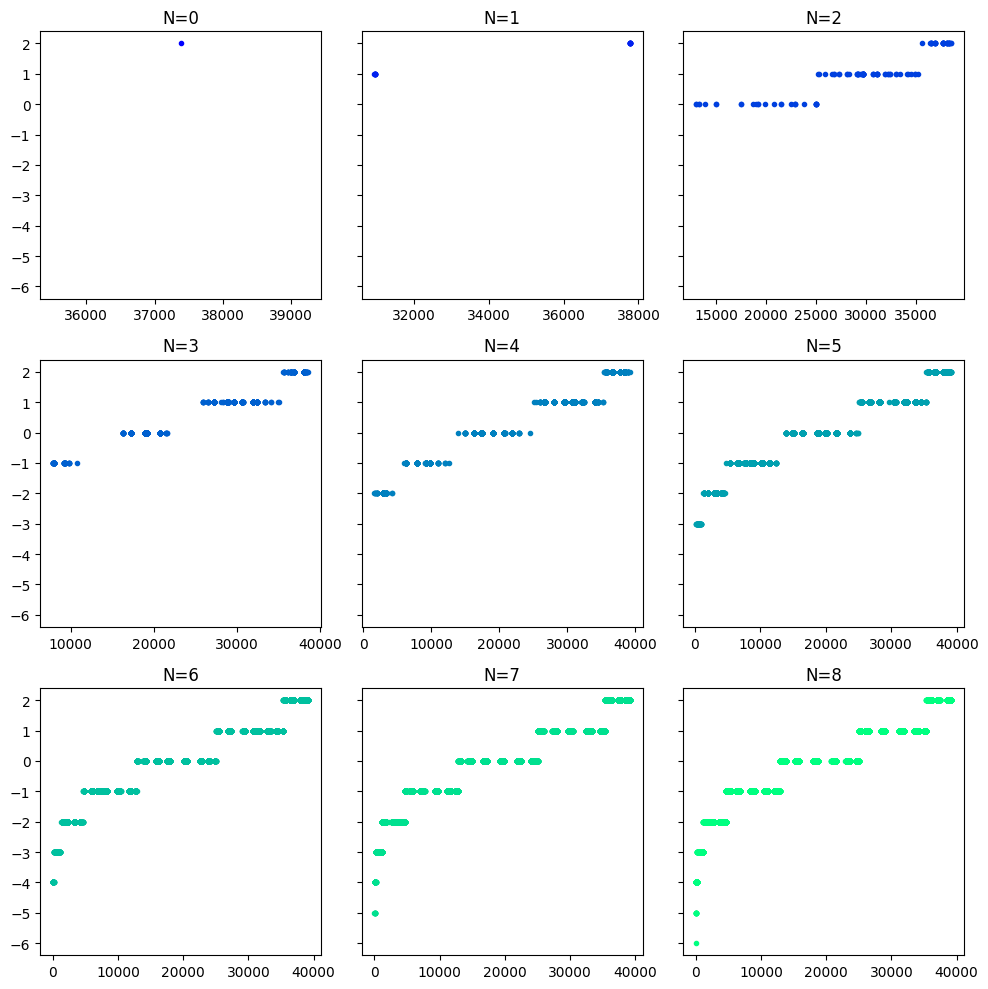

In [69]:
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

### J1=1, J2=0

/tmp/ipykernel_11561/246893774.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


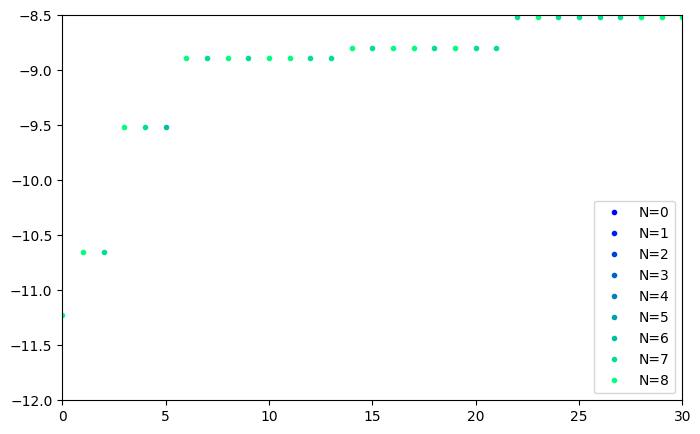

-11.228483208428862
[8 8 7 8 7 6 8 7 8 7 8 8 7 7 8]


In [26]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=1.0_J2=0.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")
plt.xlim(0,30)
plt.ylim(-12,-8.5)
plt.legend()
plt.show()
print(all_eigvals_sorted[0])

print(all_labels_sorted[:15])

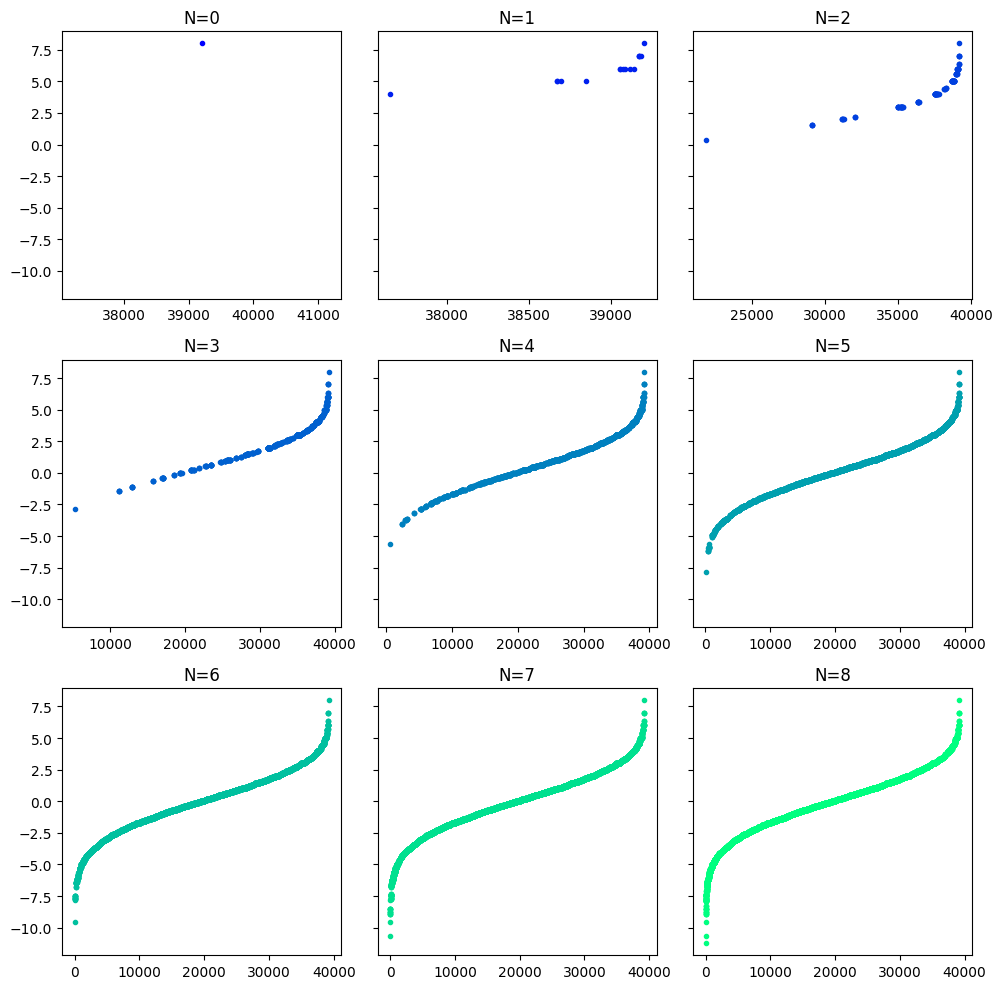

In [18]:
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

### first eigen value of the N block

1 primo autoval=4.000000000000001
2 primo autoval=0.35424868893540673
3 primo autoval=-2.8661982625090214
4 primo autoval=-5.617279503296588
5 primo autoval=-7.836537573479826
6 primo autoval=-9.517687983937275
7 primo autoval=-10.649884872663439
8 primo autoval=-11.228483208428875
9 primo autoval=-10.64988487266344
10 primo autoval=-9.517687983937282
11 primo autoval=-7.836537573479818
12 primo autoval=-5.617279503296589
13 primo autoval=-2.8661982625090214
14 primo autoval=0.35424868893540945
15 primo autoval=4.000000000000001


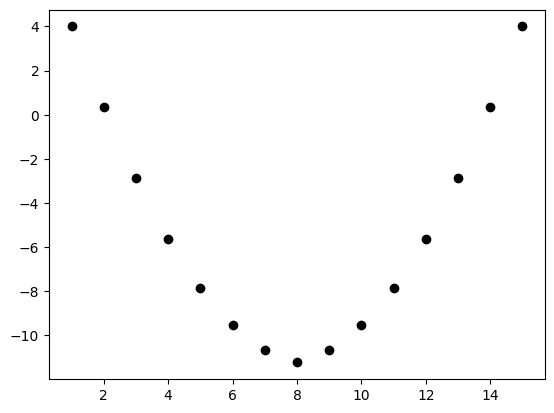

In [17]:
#%%time
#diagonalizzazione singoli blocchi

for N in range(1,L):
    HN = build_HN(L,N,J1,J2)
    vals, vecs = eigsh(HN, k=1, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    print(N, f"primo autoval={vals[0]}")#, autostato={vecs[:,0]}")
    plt.plot(N, vals[0], "o", color="black")
plt.savefig(full_path + "single_blocks_first_eigen_value.png")
plt.show()

## Sz=0

In [19]:
N=8 #metà spin up
HN = build_HN(L,N,J1,J2)

#plt.figure(figsize=(3,3))
#plt.spy(HN, markersize=0.5)
#plt.show()

In [20]:
vals, vecs = eigsh(HN, k=1, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
#np.save(full_path+"60eigen_vals", vals)
#plt.plot(vals, "o")
#plt.savefig(full_path + "60_eigen_values.png")
plt.show()

In [21]:
print(vals[0])

-11.228483208428862


In [ ]:
-11.228483208428862

## Changing J1 and J2

0
1
2
3
4
5
6
7


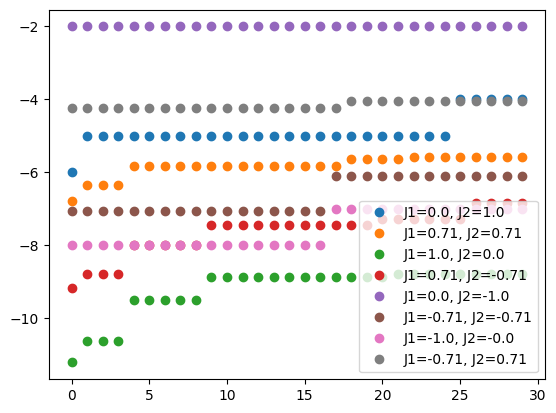

In [9]:
theta = [i*np.pi/4 for i in range(8)]
eigen_values = []
for l in range(len(theta)):
    print(l)
    J1 = np.sin(theta[l])
    J2 = np.cos(theta[l])
    row, col, data = [], [], []
    for i in range(dim):
        H = Hamiltonian(J1,J2,i)
        for value,j in H:
            row.append(i)      
            col.append(j)      
            data.append(value) #appende value in posizione (i,j) 
    sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
    vals, vecs = eigsh(sparse_matrix, k=30, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    eigen_values.append(vals)
    plt.plot(vals, 'o', label=f"J1={round(J1,2)}, J2={round(J2,2)}")
plt.legend()
plt.show()
    

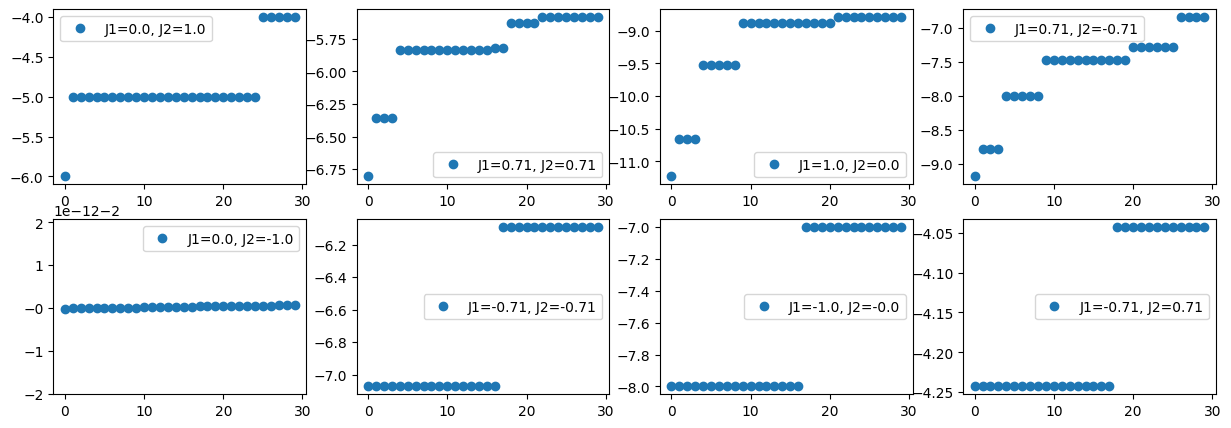

In [10]:
fig, axes = plt.subplots(2,4, figsize=(15, 5)) 
for i, ax in enumerate(axes.flat[:len(eigen_values)]):
    J1 = np.sin(theta[i])
    J2 = np.cos(theta[i])
    ax.plot(eigen_values[i],'o', label=f"J1={round(J1,2)}, J2={round(J2,2)}")
    ax.legend()
plt.savefig(full_path + "30_eigen_values_j1j2.png")
plt.show()

Iterazione 0, θ = 0.00 rad, J1=0.0, J2=1.0
Iterazione 1, θ = 0.39 rad, J1=0.38, J2=0.92
Iterazione 2, θ = 0.79 rad, J1=0.71, J2=0.71
Iterazione 3, θ = 1.18 rad, J1=0.92, J2=0.38
Iterazione 4, θ = 1.57 rad, J1=1.0, J2=0.0
Iterazione 5, θ = 1.96 rad, J1=0.92, J2=-0.38
Iterazione 6, θ = 2.36 rad, J1=0.71, J2=-0.71
Iterazione 7, θ = 2.75 rad, J1=0.38, J2=-0.92
Iterazione 8, θ = 3.14 rad, J1=0.0, J2=-1.0
Iterazione 9, θ = 3.53 rad, J1=-0.38, J2=-0.92
Iterazione 10, θ = 3.93 rad, J1=-0.71, J2=-0.71
Iterazione 11, θ = 4.32 rad, J1=-0.92, J2=-0.38
Iterazione 12, θ = 4.71 rad, J1=-1.0, J2=-0.0
Iterazione 13, θ = 5.11 rad, J1=-0.92, J2=0.38
Iterazione 14, θ = 5.50 rad, J1=-0.71, J2=0.71
Iterazione 15, θ = 5.89 rad, J1=-0.38, J2=0.92


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


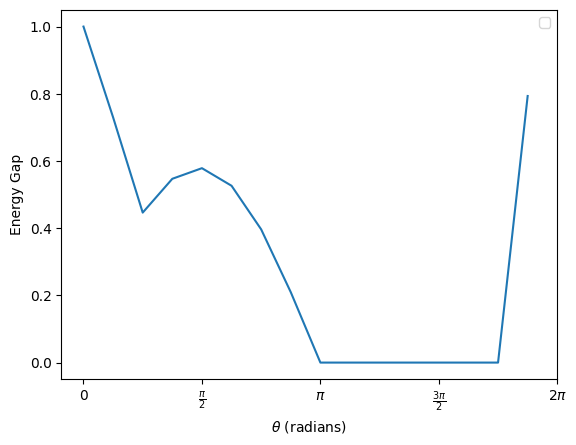

CPU times: user 5min 7s, sys: 1min 16s, total: 6min 24s
Wall time: 4min 29s


In [11]:
%%time
theta = [i*np.pi/8 for i in range(16)]
gap = []
for l in range(len(theta)):
    J1 = np.sin(theta[l])
    J2 = np.cos(theta[l])
    print(f"Iterazione {l}, θ = {theta[l]:.2f} rad, J1={round(J1,2)}, J2={round(J2,2)}")    
    row, col, data = [], [], []
    for i in range(dim):
        H = Hamiltonian(J1,J2,i)
        for value,j in H:
            row.append(i)      
            col.append(j)      
            data.append(value) #appende value in posizione (i,j) 
    sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
    vals, vecs = eigsh(sparse_matrix, k=2, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    eingen_values = np.array(vals)
    gap.append(eingen_values[1]-eingen_values[0])
    
plt.plot(theta, gap)

tick_positions = [i * np.pi / 2 for i in range(5)]  # 0, π/2, π, 3π/2, 2π
tick_labels = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
plt.xticks(tick_positions, tick_labels)

plt.xlabel(r"$\theta$ (radians)")
plt.ylabel("Energy Gap")
plt.legend()
plt.savefig(full_path + "gap_j1j2")
plt.show()

Iterazione 0, J2/J1=0.0
Iterazione 1, J2/J1=0.2
Iterazione 2, J2/J1=0.4
Iterazione 3, J2/J1=0.6
Iterazione 4, J2/J1=0.8
Iterazione 5, J2/J1=1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


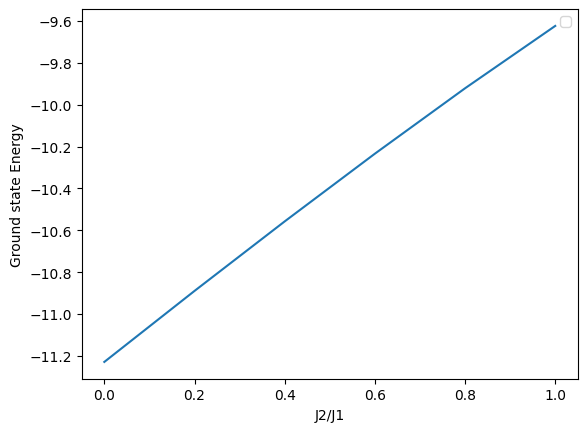

CPU times: user 1min 43s, sys: 16.5 s, total: 2min
Wall time: 1min 33s


In [13]:
%%time
J1 = 1.0
J2_val = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
g_energy = []
for l in range(len(J2_val)):
    J2 = J2_val[l]
    print(f"Iterazione {l}, J2/J1={round(J2/J1,2)}")    
    row, col, data = [], [], []
    for i in range(dim):
        H = Hamiltonian(J1,J2,i)
        for value,j in H:
            row.append(i)      
            col.append(j)      
            data.append(value) #appende value in posizione (i,j) 
    sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
    vals, vecs = eigsh(sparse_matrix, k=1, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    eingen_values = np.array(vals)
    g_energy.append(eingen_values[0])
    
plt.plot(J2_val, g_energy)

plt.xlabel(r"J2/J1")
plt.ylabel("Ground state Energy")
plt.legend()
plt.savefig(full_path + "g_energy_j1j2")
plt.show()

In [ ]:
plt.plot(J2_val, np.array(g_energy)/16)
plt.xlabel(r"J2/J1")
plt.ylabel("Ground state Energy")
plt.legend()
plt.savefig(full_path + "g_energy_j1j2")
plt.show()

# Cose da fare

plot energie delle prime 10-12 al variare di J1 e J2

plot del gap

calcolare funzioni di correlazione spin spin <Si*Sj> a primi vicini e secondi vicini, somme su tutte le configurazioni <psi|O psi>=somme su x x' di <psi|x> <x|O|x'> <x'|psi'> primo e ultimo pezzo li ho già perchè ho diagonalizzato (sono lautostato) 
se J1 =0 --> anche SiSj =0
se J2 =0 --> SiSj non è 0